In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Preparación de los generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255) # Normalización de los datos
validation_datagen = ImageDataGenerator(rescale=1./255) # Normalización de los datos

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\Imagenes\Fotogramas\Entrenamiento',
    target_size=(48, 48), # Redimensionamiento de las imágenes
    batch_size=32, # Tamaño del lote de procesamiento
    class_mode='binary' # Clasificación binaria porque solo hay dos clases
)

validation_generator = validation_datagen.flow_from_directory(
    r'C:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\Imagenes\Fotogramas\Validacion',
    target_size=(48, 48), # Redimensionamiento de las imágenes
    batch_size=32, # Tamaño del lote de procesamiento
    class_mode='binary' # Clasificación binaria porque solo hay dos clases
)

Found 30000 images belonging to 2 classes.
Found 588 images belonging to 2 classes.


In [24]:
print(train_generator.class_indices)

{'Estable': 0, 'Inestable': 1}


In [3]:
# Definición del modelo
model = tf.keras.models.Sequential([ # Modelo de red neuronal convolucional CNN
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)), # Capa de convolución con 32 filtros de 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Capa de convolución con 64 filtros de 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    tf.keras.layers.Flatten(), # Aplanamiento de las características detectadas en un vector unidimensional
    tf.keras.layers.Dense(512, activation='relu'), # Capa densa con 512 neuronas
    tf.keras.layers.Dense(1, activation='sigmoid') # Capa densa con 1 neurona y función de activación sigmoide
])

c:\Users\carolina\Documents\VS Code\Reconocimiento_emociones_modelo\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compilación del modelo
model.compile(optimizer='adam', # Algoritmo de optimización Adam: adaptativo y eficiente
              loss='binary_crossentropy', # Función de pérdida para clasificación binaria (entropía cruzada)
              metrics=['accuracy']) # Métrica de evaluación de la precisión

In [19]:
# Entrenamiento del modelo
history = model.fit(train_generator, # Generador de datos de entrenamiento
                    steps_per_epoch=938, # Número de pasos por época
                    epochs=15, # Número de épocas
                    validation_data=validation_generator, # Generador de datos de validación
                    validation_steps=19) # Número de pasos de validación

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 170s 180ms/step - accuracy: 0.9911 - loss: 0.0377 - val_accuracy: 0.8503 - val_loss: 1.5421
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.8469 - val_loss: 1.6887
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9988 - loss: 0.0040 - val_accuracy: 0.8452 - val_loss: 1.8691
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9991 - loss: 0.0023 - val_accuracy: 0.8418 - val_loss: 2.0391
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9976 - loss: 0.0089 - val_accurac

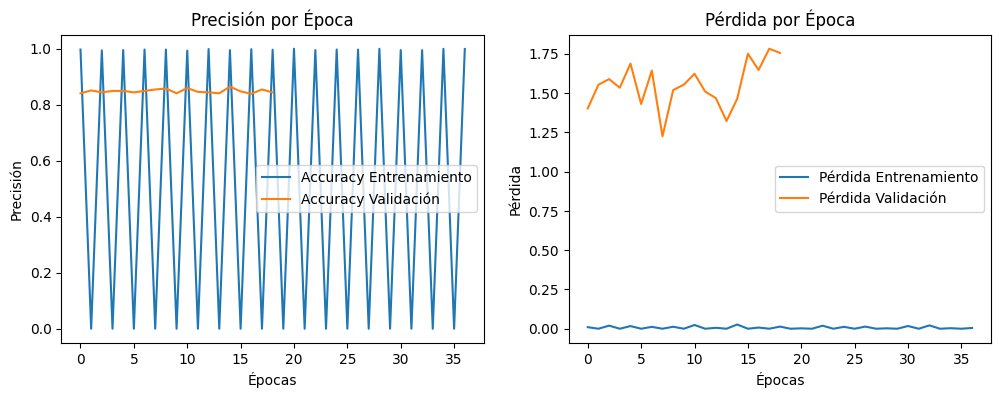

In [17]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [18]:
# Mostrar la mejor precisión y pérdida de entrenamiento y validación obtenidas en una época
print('Numero de la mejor epoca de entrenamiento: ', history.history['accuracy'].index(max(history.history['accuracy']))+1)
print('Numero de la mejor epoca de validación: ', history.history['val_accuracy'].index(max(history.history['val_accuracy']))+1)
print('Precisión de entrenamiento: ', max(history.history['accuracy']))
print('Precisión de validación: ', max(history.history['val_accuracy']))
print('Pérdida de entrenamiento: ', min(history.history['loss']))
print('Pérdida de validación: ', min(history.history['val_loss']))

Numero de la mejor epoca de entrenamiento:  21
Numero de la mejor epoca de validación:  15
Precisión de entrenamiento:  0.9992333054542542
Precisión de validación:  0.8639456033706665
Pérdida de entrenamiento:  0.0
Pérdida de validación:  1.2252219915390015


La mejor época a dejar es la 15va

In [20]:
# Precisión y pérdida en la última época
print('Numero de la ultima epoca: ', len(history.history['accuracy']))
print('Precisión en la última época de entrenamiento: ', history.history['accuracy'][-1])
print('Precisión en la última época de validación: ', history.history['val_accuracy'][-1])
print('Pérdida en la última época de entrenamiento: ', history.history['loss'][-1])
print('Pérdida en la última época de validación: ', history.history['val_loss'][-1])

Numero de la ultima epoca:  15
Precisión en la última época de entrenamiento:  0.996566653251648
Precisión en la última época de validación:  0.8435373902320862
Pérdida en la última época de entrenamiento:  0.010562775656580925
Pérdida en la última época de validación:  2.2794835567474365


In [21]:
# Guardado del modelo
model.save('Modelos/model_estable_inestable.h5')

In [22]:
# Conversión del modelo a formato tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmprq4219hz\assets


INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmprq4219hz\assets


Saved artifact at 'C:\Users\carolina\AppData\Local\Temp\tmprq4219hz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2241590041808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590041232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590042576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590042960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590040848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590043344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590043536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590044112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590042384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2241590045072: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [23]:
# Guardado del modelo tflite
with open('Modelos/model_estable_inestable.tflite', 'wb') as f:
    f.write(tflite_model)